In [0]:
# Import required modules and classes
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Our data
# We have 4 documents, each is a string.
# The labels indicate whether the document is about CUHK
docs = [
    "CUHK is a university in Hong Kong",
    "Hong Kong is a city in Southeast Asia",
    "Asia is the most populous continent",
    "CUHK is located in Shatin"
]
labels = [1, 0, 0, 1]

In [0]:
# Initialize the vectorizer and the LR model
vectorizer = CountVectorizer()
model = LogisticRegression()

In [4]:
# Train the vectorizer and the model
# We use fit_transform to fit the model and transform
# our documents into feature vectors in one step
X = vectorizer.fit_transform(docs)
model.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
# Let's take a look at our vocabulary
vectorizer.vocabulary_

{'asia': 0,
 'city': 1,
 'continent': 2,
 'cuhk': 3,
 'hong': 4,
 'in': 5,
 'is': 6,
 'kong': 7,
 'located': 8,
 'most': 9,
 'populous': 10,
 'shatin': 11,
 'southeast': 12,
 'the': 13,
 'university': 14}

In [12]:
# The weights learnt in the model
# Note that we have 15 weights (vocabulary size)
model.coef_

array([[-0.50064704, -0.29108559, -0.20956145,  0.50627608, -0.01686009,
         0.21519048,  0.00562903, -0.01686009,  0.23205058, -0.20956145,
        -0.20956145,  0.23205058, -0.29108559, -0.20956145,  0.2742255 ]])

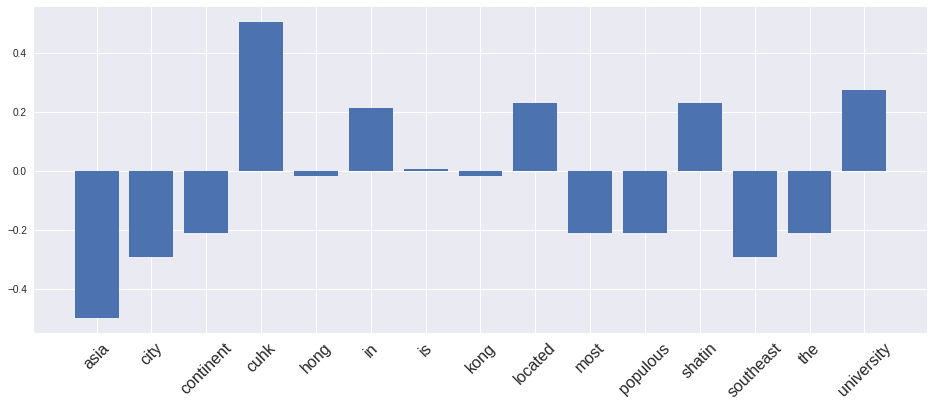

In [15]:
# Plot the weights of each word
x = sorted([w for w in vectorizer.vocabulary_])
y = model.coef_[0]
plt.figure(figsize=(16, 6))
plt.bar(x, y)
ticks = plt.xticks(range(15), x, rotation=45, fontsize=16)

In [16]:
# Let's try applying the model on a new document
model.predict_proba(vectorizer.transform(["CUHK university"]))

array([[0.31300011, 0.68699989]])